# EDA

In [161]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## TN + TMDB

In [162]:
tmdb = pd.read_csv('../data/final/tn_tmdb_final.csv')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1741 non-null   object 
 1   title              1741 non-null   object 
 2   production_budget  1741 non-null   int64  
 3   worldwide_gross    1741 non-null   int64  
 4   premiere_year      1741 non-null   int64  
 5   day                1741 non-null   int64  
 6   original_language  1741 non-null   object 
 7   ROI                1741 non-null   float64
 8   Action             1741 non-null   int64  
 9   Adventure          1741 non-null   int64  
 10  Animation          1741 non-null   int64  
 11  Comedy             1741 non-null   int64  
 12  Crime              1741 non-null   int64  
 13  Documentary        1741 non-null   int64  
 14  Drama              1741 non-null   int64  
 15  Family             1741 non-null   int64  
 16  Fantasy            1741 

### Genres as X and ROI as y

In [163]:
y_1 = tmdb['ROI']
X_1 = tmdb.drop(columns=['ROI', 'worldwide_gross', 'production_budget', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'premiere_month_1', 'premiere_month_2', 'premiere_month_3', 'premiere_month_4', 'premiere_month_5', 'premiere_month_6',
'premiere_month_7', 'premiere_month_8', 'premiere_month_9', 'premiere_month_10', 'premiere_month_11', 'premiere_month_12'])

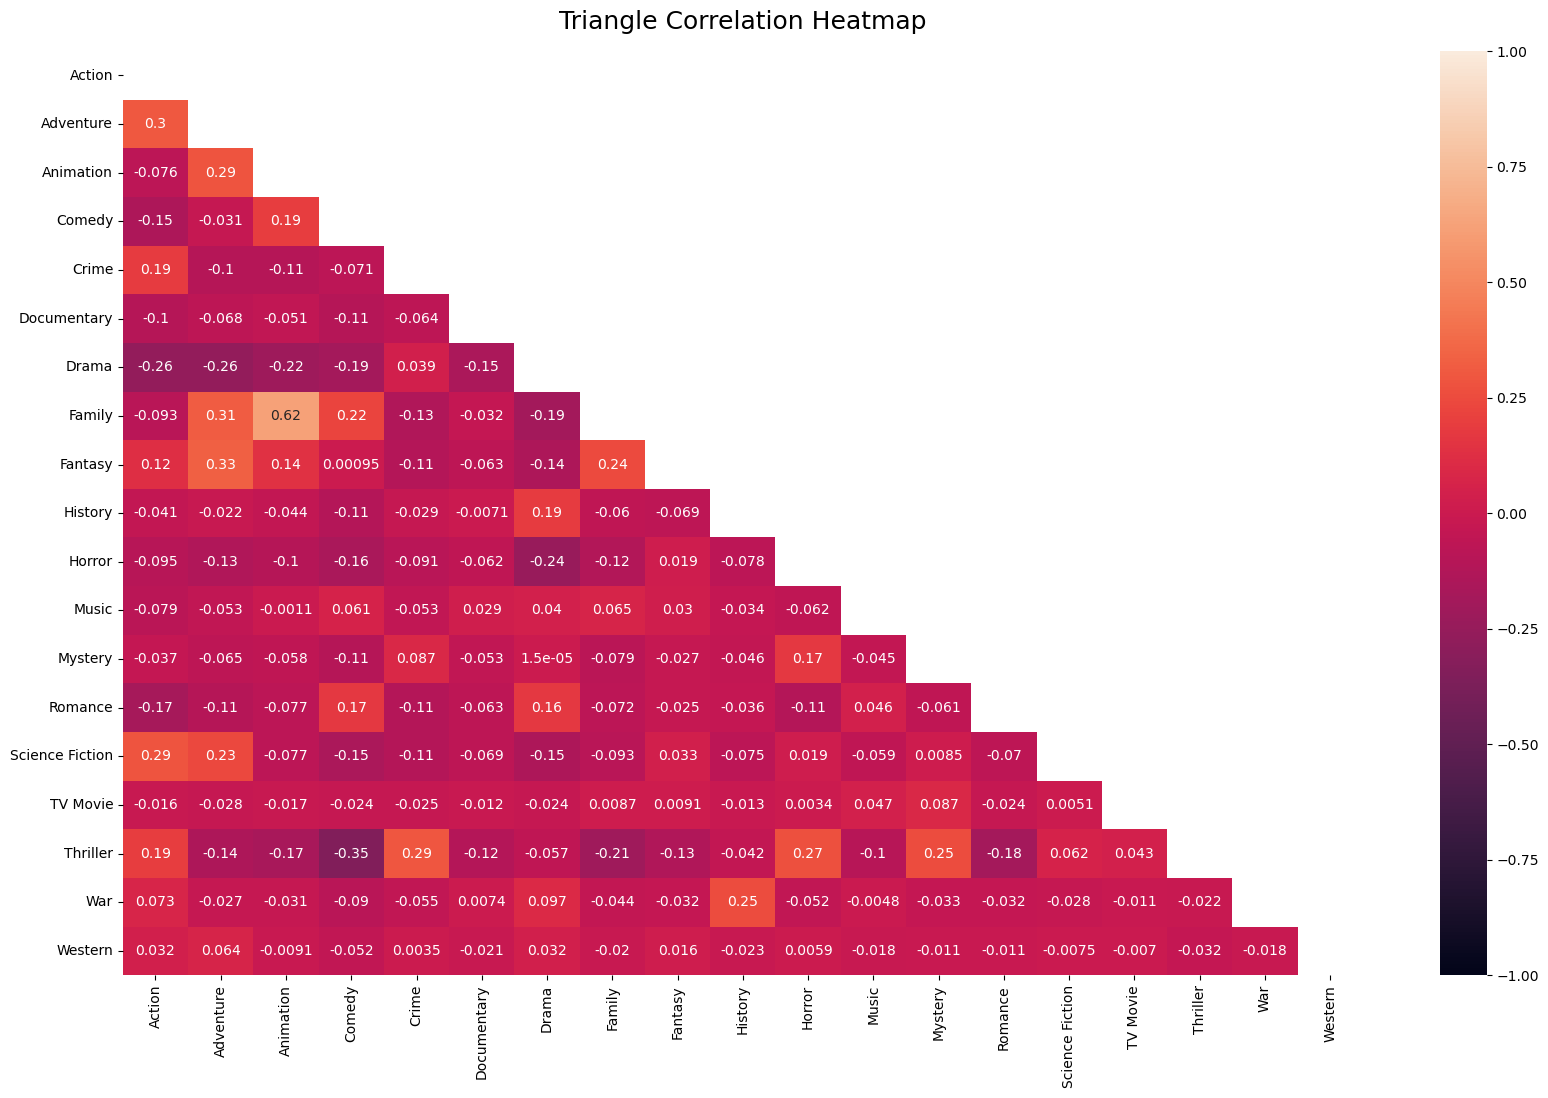

In [164]:
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_1.corr(), dtype=bool))
heatmap = sns.heatmap(X_1.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [165]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Action           1741 non-null   int64
 1   Adventure        1741 non-null   int64
 2   Animation        1741 non-null   int64
 3   Comedy           1741 non-null   int64
 4   Crime            1741 non-null   int64
 5   Documentary      1741 non-null   int64
 6   Drama            1741 non-null   int64
 7   Family           1741 non-null   int64
 8   Fantasy          1741 non-null   int64
 9   History          1741 non-null   int64
 10  Horror           1741 non-null   int64
 11  Music            1741 non-null   int64
 12  Mystery          1741 non-null   int64
 13  Romance          1741 non-null   int64
 14  Science Fiction  1741 non-null   int64
 15  TV Movie         1741 non-null   int64
 16  Thriller         1741 non-null   int64
 17  War              1741 non-null   int64
 18  Western 

In [166]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_1)
scaled_df = pd.DataFrame(scaled_data, columns=X_1.columns)

In [167]:
X_1_augmented = sm.add_constant(X_1)
X_1_augmented

,const,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1737,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1738,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1739,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [168]:
tmdb_regression = sm.OLS(y_1, X_1_augmented).fit()

In [169]:
print(tmdb_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.987
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.57e-05
Time:                        23:50:32   Log-Likelihood:                -6748.1
No. Observations:                1741   AIC:                         1.354e+04
Df Residuals:                    1721   BIC:                         1.365e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5793      0.858     

In [170]:
tmdb_regression.rsquared_adj

0.021235109790455953

### Premiere months as X and ROI as y

In [171]:
y_2 = tmdb['ROI']
X_2 = tmdb.drop(columns=['ROI', 'worldwide_gross', 'production_budget', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'Action', 
'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 
'War', 'Western'])

In [172]:
X_2_augmented = sm.add_constant(X_2)
X_2_augmented

,const,premiere_month_1,premiere_month_2,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,0,0,0,1,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,1.0,0,1,0,0,0,0,0,0,0,0,0,0
1737,1.0,0,0,1,0,0,0,0,0,0,0,0,0
1738,1.0,1,0,0,0,0,0,0,0,0,0,0,0
1739,1.0,0,0,0,0,0,0,0,0,1,0,0,0


In [173]:
tmdb_regression_2 = sm.OLS(y_2, X_2_augmented.astype(float)).fit()

In [174]:
tmdb_regression_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.418
Date:                Wed, 02 Oct 2024   Prob (F-statistic):              0.150
Time:                        23:50:32   Log-Likelihood:                -6767.8
No. Observations:                1741   AIC:                         1.356e+04
Df Residuals:                    1728   BIC:                         1.363e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.997e+12    2.3e+13      0.260      0.795   -3.92e+13    5.12e+13
premiere_month_1  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_2  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_3  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_4  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_5  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_6  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_7  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_8  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_9  -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_10 -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_11 -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
premiere_month_12 -5.997e+12    2.3e+13     -0.260      0.795   -5.12e+13    3.92e+13
==============================================================================
Omnibus:                     4286.981   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50676440.549
Skew:                          25.071   Prob(JB):                         0.00
Kurtosis:                     837.308   Cond. No.                     3.05e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [175]:
y_3 = tmdb['ROI']
X_3 = tmdb.drop(columns=['ROI', 'release_date', 'title', 'original_language', 'day', 'premiere_year', 'worldwide_gross', 'production_budget'])

In [176]:
X_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Action             1741 non-null   int64
 1   Adventure          1741 non-null   int64
 2   Animation          1741 non-null   int64
 3   Comedy             1741 non-null   int64
 4   Crime              1741 non-null   int64
 5   Documentary        1741 non-null   int64
 6   Drama              1741 non-null   int64
 7   Family             1741 non-null   int64
 8   Fantasy            1741 non-null   int64
 9   History            1741 non-null   int64
 10  Horror             1741 non-null   int64
 11  Music              1741 non-null   int64
 12  Mystery            1741 non-null   int64
 13  Romance            1741 non-null   int64
 14  Science Fiction    1741 non-null   int64
 15  TV Movie           1741 non-null   int64
 16  Thriller           1741 non-null   int64
 17  War           

In [177]:
X_3_augmented = sm.add_constant(X_3)
X_3_augmented

,const,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1737,1.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1738,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
tmdb_regression_3 = sm.OLS(y_3, X_3_augmented).fit()

In [179]:
tmdb_regression_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.507
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.30e-05
Time:                        23:50:32   Log-Likelihood:                -6738.8
No. Observations:                1741   AIC:                         1.354e+04
Df Residuals:                    1710   BIC:                         1.371e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.3615      0.792      4.244      0.000       1.808       4.915
Action               -1.3427      0.799     -1.681      0.093      -2.909       0.224
Adventure             0.1136      0.941      0.121      0.904      -1.732       1.959
Animation             1.4796      1.476      1.002      0.316      -1.416       4.375
Comedy               -0.7600      0.739     -1.028      0.304      -2.210       0.690
Crime                -1.0266      0.925     -1.110      0.267      -2.840       0.787
Documentary          -1.3826      1.696     -0.815      0.415      -4.709       1.944
Drama                -1.0805      0.722     -1.497      0.134      -2.496       0.335
Family               -0.8842      1.272     -0.695      0.487      -3.379       1.611
Fantasy              -0.9862      1.028     -0.959      0.338      -3.003       1.031
History              -0.6640      1.518     -0.437      0.662      -3.642       2.314
Horror                4.8519      1.005      4.827      0.000       2.880       6.823
Music                -0.0577      1.805     -0.032      0.974      -3.598       3.483
Mystery              -0.3820      1.143     -0.334      0.738      -2.623       1.859
Romance               0.1433      0.903      0.159      0.874      -1.629       1.915
Science Fiction      -0.8867      0.974     -0.910      0.363      -2.797       1.024
TV Movie             -1.4880      4.492     -0.331      0.740     -10.297       7.321
Thriller              0.5813      0.785      0.741      0.459      -0.958       2.121
War                  -0.7752      1.817     -0.427      0.670      -4.340       2.789
Western              -2.0275      2.601     -0.780      0.436      -7.129       3.074
premiere_month_1      0.8305      1.045      0.795      0.427      -1.219       2.880
premiere_month_2     -0.4678      1.027     -0.455      0.649      -2.483       1.547
premiere_month_3     -0.6325      0.935     -0.677      0.499      -2.466       1.201
premiere_month_4     -0.2509      0.924     -0.272      0.786      -2.063       1.561
premiere_month_5     -0.2538      1.050     -0.242      0.809      -2.314       1.806
premiere_month_6      0.8599      0.952      0.903      0.367      -1.007       2.727
premiere_month_7      3.7747      0.936      4.033      0.000       1.939       5.610
premiere_month_8     -0.5017      0.929     -0.540      0.589      -2.324       1.321
premiere_month_9     -1.0179      0.910     -1.118      0.264      -2.803       0.767
premiere_month_10     0.2804      0.873      0.321      0.748      -1.433       1.993
premiere_month_11     0.7214      0.918      0.785      0.432      -1.080       2.523
premiere_month_12     0.0193      0.886      0.022      0.983      -1.718       1.757
=========================================================================

---

## TN + IMDB

In [181]:
imdb = pd.read_csv('../data/final/tn_imdb_final.csv')
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2095 non-null   object 
 1   production_budget  2095 non-null   int64  
 2   worldwide_gross    2095 non-null   int64  
 3   runtime_minutes    1939 non-null   float64
 4   premiere_year      2095 non-null   int64  
 5   premiere_day       2095 non-null   int64  
 6   ROI                2095 non-null   float64
 7   Action             2095 non-null   int64  
 8   Adventure          2095 non-null   int64  
 9   Animation          2095 non-null   int64  
 10  Biography          2095 non-null   int64  
 11  Comedy             2095 non-null   int64  
 12  Crime              2095 non-null   int64  
 13  Documentary        2095 non-null   int64  
 14  Drama              2095 non-null   int64  
 15  Family             2095 non-null   int64  
 16  Fantasy            2095 

In [182]:
y_4 = imdb['ROI']
X_4 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'production_budget', 'title', 'premiere_day', 'premiere_year'])

In [183]:
X_4_augmented = sm.add_constant(X_4)
X_4_augmented

,const,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2091,1.0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2092,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2093,1.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [184]:
imdb_regression = sm.OLS(y_4, X_4_augmented).fit()

In [185]:
print(imdb_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.173
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           0.000134
Time:                        23:50:32   Log-Likelihood:                -8465.4
No. Observations:                2095   AIC:                         1.700e+04
Df Residuals:                    2061   BIC:                         1.719e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3090      0.93

#### Splitting movie runtime into buckets as another set of categorical variables

In [186]:
imdb[imdb['runtime_minutes'].isna()]

,title,production_budget,worldwide_gross,runtime_minutes,premiere_year,premiere_day,ROI,Action,Adventure,Animation,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12
28,King Kong,207000000,550517357,NaN,2005,14,1.659504,1,1,0,...,0,0,0,0,0,0,0,0,0,1
30,Titanic,200000000,2208208395,NaN,1997,19,10.041042,0,1,0,...,0,0,0,0,0,0,0,0,0,1
75,Coco,175000000,798008101,NaN,2017,22,3.560046,0,0,0,...,0,0,0,0,0,0,0,0,1,0
160,Noah,130000000,352831065,NaN,2014,28,1.714085,0,0,1,...,1,0,0,0,0,0,0,0,0,0
252,What Lies Beneath,90000000,288693989,NaN,2000,21,2.207711,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,Jackpot,400000,44452,NaN,2001,27,-0.888870,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2060,Swingers,200000,6618578,NaN,1996,18,32.092890,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2088,Emily,27000,3547,NaN,2017,27,-0.868630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2089,The Terrorist,25000,195043,NaN,2000,14,6.801720,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
imdb.dropna(subset=['runtime_minutes'], inplace=True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 2094
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1939 non-null   object 
 1   production_budget  1939 non-null   int64  
 2   worldwide_gross    1939 non-null   int64  
 3   runtime_minutes    1939 non-null   float64
 4   premiere_year      1939 non-null   int64  
 5   premiere_day       1939 non-null   int64  
 6   ROI                1939 non-null   float64
 7   Action             1939 non-null   int64  
 8   Adventure          1939 non-null   int64  
 9   Animation          1939 non-null   int64  
 10  Biography          1939 non-null   int64  
 11  Comedy             1939 non-null   int64  
 12  Crime              1939 non-null   int64  
 13  Documentary        1939 non-null   int64  
 14  Drama              1939 non-null   int64  
 15  Family             1939 non-null   int64  
 16  Fantasy            1939 non-n

In [188]:
imdb[imdb['runtime_minutes'] == 0]

,title,production_budget,worldwide_gross,runtime_minutes,premiere_year,premiere_day,ROI,Action,Adventure,Animation,...,premiere_month_3,premiere_month_4,premiere_month_5,premiere_month_6,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12


In [189]:
# Creating runtime buckets
length60 = imdb['runtime_minutes'].between(0,60)
length90 = imdb['runtime_minutes'].between(60,90)
length120 = imdb['runtime_minutes'].between(90,120)
length180 = imdb['runtime_minutes'].between(120,180)
imdb['length_60'] = length60
imdb['length_90'] = length90
imdb['length_120'] = length120
imdb['length_180'] = length180

In [190]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1939 entries, 0 to 2094
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1939 non-null   object 
 1   production_budget  1939 non-null   int64  
 2   worldwide_gross    1939 non-null   int64  
 3   runtime_minutes    1939 non-null   float64
 4   premiere_year      1939 non-null   int64  
 5   premiere_day       1939 non-null   int64  
 6   ROI                1939 non-null   float64
 7   Action             1939 non-null   int64  
 8   Adventure          1939 non-null   int64  
 9   Animation          1939 non-null   int64  
 10  Biography          1939 non-null   int64  
 11  Comedy             1939 non-null   int64  
 12  Crime              1939 non-null   int64  
 13  Documentary        1939 non-null   int64  
 14  Drama              1939 non-null   int64  
 15  Family             1939 non-null   int64  
 16  Fantasy            1939 non-n

In [191]:
y_5 = imdb['ROI']
X_5 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'production_budget', 'title', 'premiere_day', 'premiere_year'])

In [192]:
X_5_augmented = sm.add_constant(X_5)
X_5_augmented

,const,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12,length_60,length_90,length_120,length_180
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,False,False,True,False
1,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
4,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,False,True,False,False
2090,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,False,False,True,False
2091,1.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,False,True,False,False
2092,1.0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,False,False,True,False


In [193]:
imdb_regression_2 = sm.OLS(y_5, X_5_augmented.astype(float)).fit()

In [194]:
print(imdb_regression_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.316
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.37e-05
Time:                        23:50:32   Log-Likelihood:                -7890.5
No. Observations:                1939   AIC:                         1.586e+04
Df Residuals:                    1901   BIC:                         1.607e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6581      1.93

In [273]:
imdb_regression_2.rsquared 

0.04313999197483742

In [242]:
weights = imdb_regression_2.params

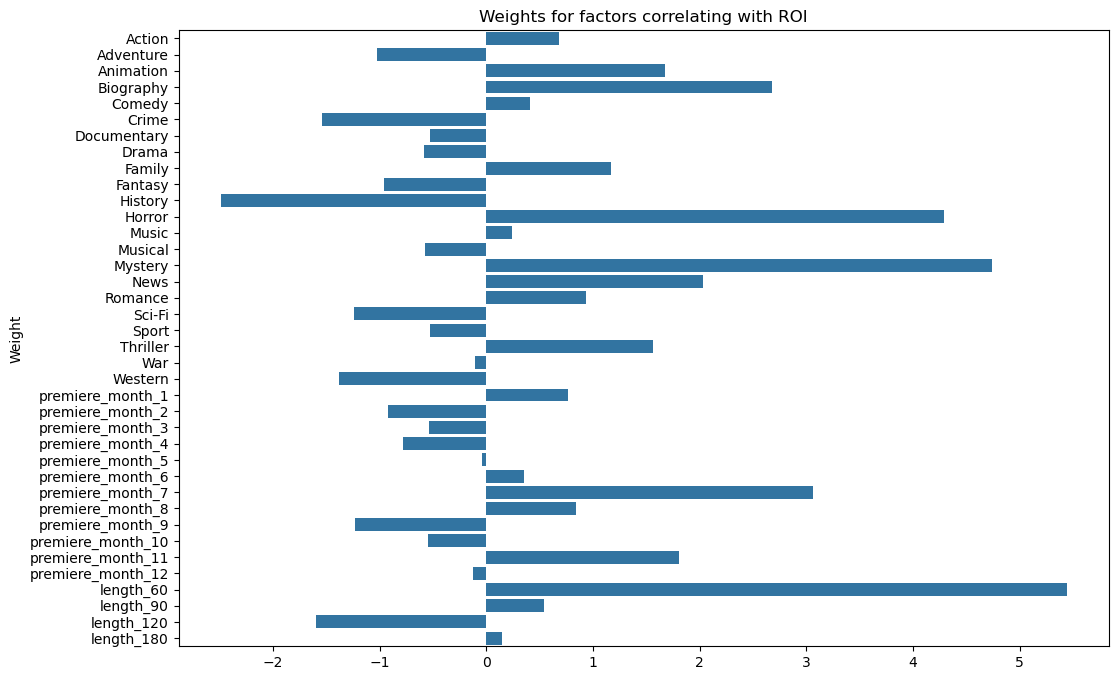

In [247]:
# Plotting the coefficients
plt.figure(figsize=(12,8))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with ROI")
plt.ylabel('Weight')
plt.show()

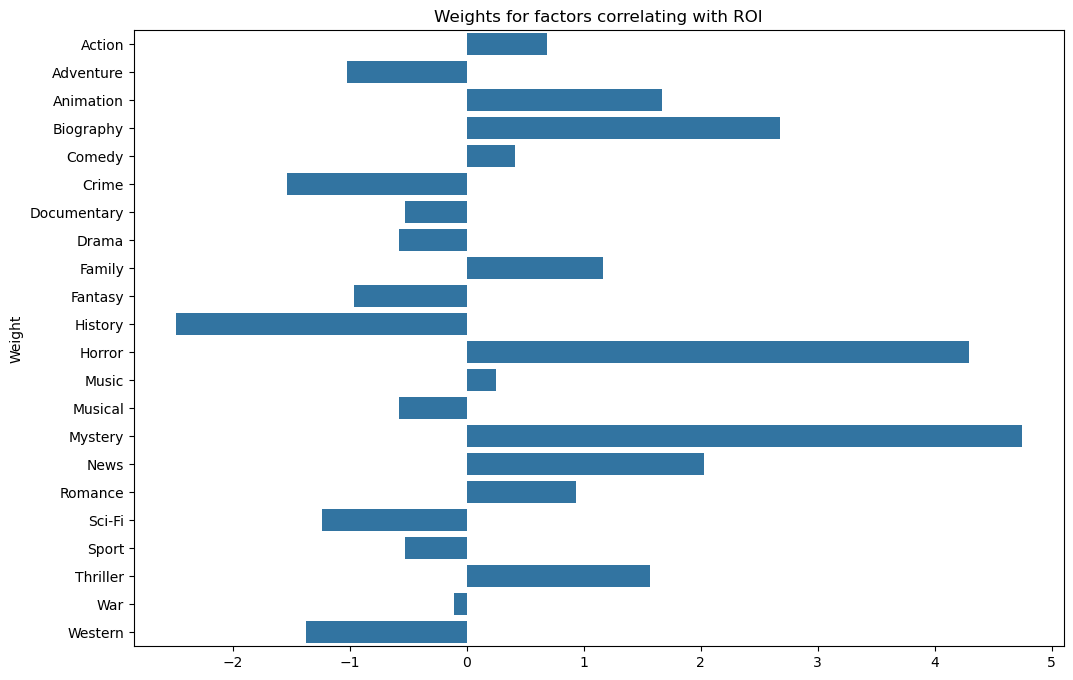

In [262]:
# Plotting part of the coefficients
plt.figure(figsize=(12,8))
sns.barplot(y = weights[1:23:].index, x = weights[1:23:].values)
plt.title("Weights for factors correlating with ROI")
plt.ylabel('Weight')
plt.show()

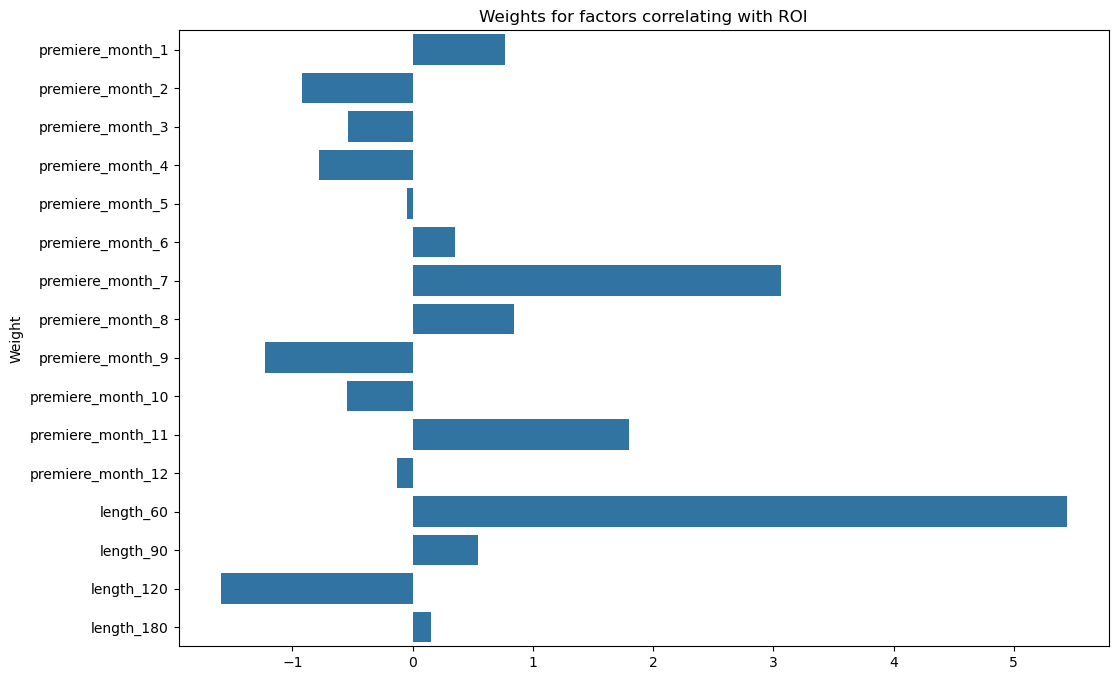

In [271]:
# Plotting part of the coefficients
plt.figure(figsize=(12,8))
sns.barplot(y = weights[23:40:].index, x = weights[23:40:].values)
plt.title("Weights for factors correlating with ROI")
plt.ylabel('Weight')
plt.show()

In [ ]:
y_7 = imdb['ROI']
X_7 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'production_budget', 'title', 'premiere_day', 'premiere_year'])

---

#### Testing regression with revenue as dependent variable

In [255]:
y_6 = imdb['worldwide_gross']
X_6 = imdb.drop(columns=['ROI', 'runtime_minutes', 'worldwide_gross', 'title', 'premiere_day', 'premiere_year', 'production_budget', 'Premiere_Month'])

In [256]:
X_6_augmented = sm.add_constant(X_6)
X_6_augmented

,const,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12,length_60,length_90,length_120,length_180
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,False,False,True,False
1,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
2,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,True,False
3,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
4,1.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,1.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,False,True,False,False
2090,1.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,False,False,True,False
2091,1.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,False,True,False,False
2092,1.0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,False,False,True,False


In [257]:
imdb_regression_rev = sm.OLS(y_6, X_6_augmented.astype(float)).fit()

In [258]:
print(imdb_regression_rev.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     26.20
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          4.99e-142
Time:                        10:17:04   Log-Likelihood:                -39602.
No. Observations:                1939   AIC:                         7.928e+04
Df Residuals:                    1901   BIC:                         7.949e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.142e+08   2.46e+0

In [259]:
weights_rev = imdb_regression_rev.params 

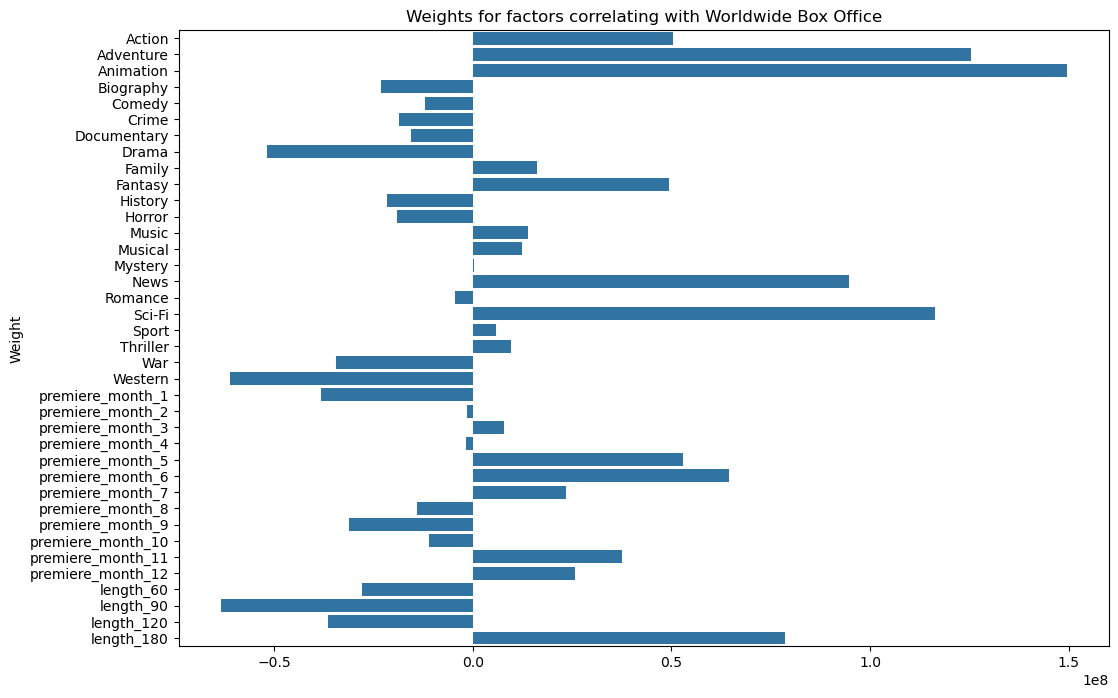

In [260]:
plt.figure(figsize=(12,8))
sns.barplot(y = weights_rev[1::].index, x = weights_rev[1::].values)
plt.title("Weights for factors correlating with Worldwide Box Office")
plt.ylabel('Weight')
plt.show()

---

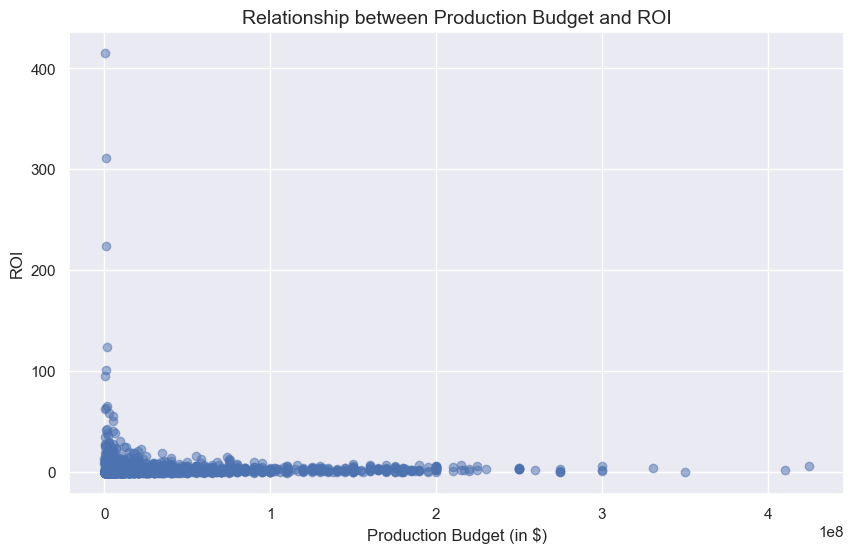

In [304]:
# A scatter plot to visualize the relationship between production_budget and ROI
plt.figure(figsize=(10, 6))
plt.scatter(imdb['production_budget'], imdb['ROI'], alpha=0.5)
sns.set_style('darkgrid')
coefficients = np.polyfit(imdb['production_budget'], imdb['ROI'], 1)
#poly_eq = np.poly1d(coefficients)
#plt.plot(imdb['production_budget'], poly_eq(imdb['production_budget']), color='red')

# Add titles and labels
plt.title('Relationship between Production Budget and ROI', fontsize=14)
plt.xlabel('Production Budget (in $)', fontsize=12)
plt.ylabel('ROI', fontsize=12)

# Show the plot
plt.show()

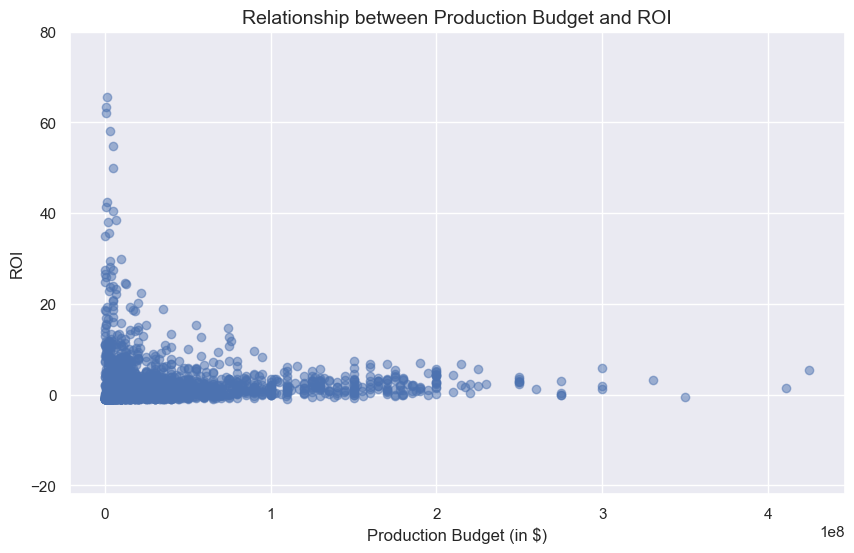

In [311]:
# A scatter plot to visualize the relationship between production_budget and ROI
plt.figure(figsize=(10, 6))
plt.scatter(imdb['production_budget'], imdb['ROI'], alpha=0.5)
sns.set_theme(style='darkgrid')
coefficients = np.polyfit(imdb['production_budget'], imdb['ROI'], 1)
#poly_eq = np.poly1d(coefficients)
#plt.plot(imdb['production_budget'], poly_eq(imdb['production_budget']), color='red')

plt.ylim(top=80)

# Add titles and labels
plt.title('Relationship between Production Budget and ROI', fontsize=14)
plt.xlabel('Production Budget (in $)', fontsize=12)
plt.ylabel('ROI', fontsize=12)

# Show the plot

plt.show()

In [204]:
imdb[imdb['ROI'] > 80]

,title,production_budget,worldwide_gross,runtime_minutes,premiere_year,premiere_day,ROI,Action,Adventure,Animation,...,premiere_month_7,premiere_month_8,premiere_month_9,premiere_month_10,premiere_month_11,premiere_month_12,length_60,length_90,length_120,length_180
1930,Snow White and the Seven Dwarfs,1488000,184925486,49.0,1937,21,123.277880,0,0,1,...,0,0,0,0,0,1,True,False,False,False
1950,Rocky,1000000,225000000,136.0,1976,21,224.000000,1,0,0,...,0,0,0,0,1,0,False,False,False,True
1951,The Devil Inside,1000000,101759490,83.0,2012,6,100.759490,0,0,0,...,0,0,0,0,0,0,False,True,False,False
1998,Bambi,858000,268000000,58.0,1942,13,311.354312,0,0,0,...,0,1,0,0,0,0,True,False,False,False
2048,Graduation Day,250000,23894000,75.0,1981,1,94.576000,0,0,0,...,0,0,0,0,0,0,False,True,False,False
2076,The Gallows,100000,41656474,81.0,2015,10,415.564740,0,0,0,...,1,0,0,0,0,0,False,True,False,False


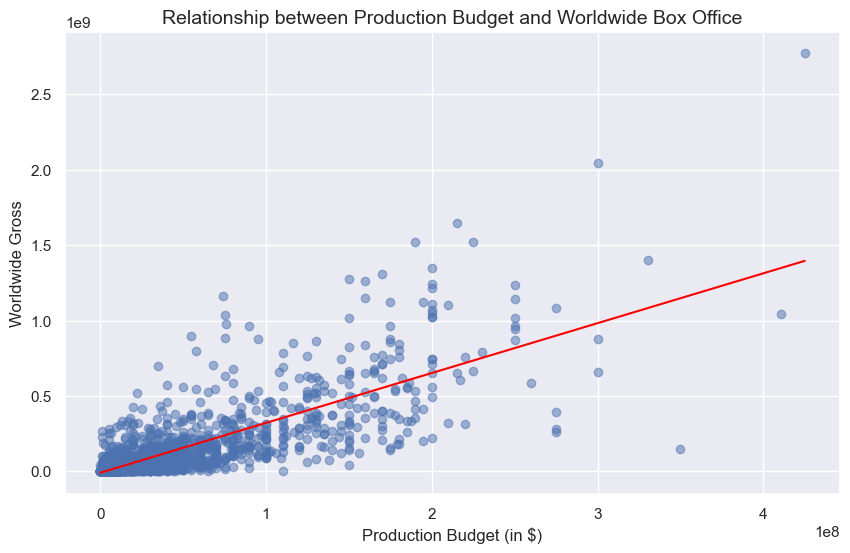

In [313]:
# A scatter plot to visualize the relationship between production_budget and worldwide_gross
plt.figure(figsize=(10, 6))
plt.scatter(imdb['production_budget'], imdb['worldwide_gross'], alpha=0.5)
sns.set_theme(style='darkgrid')

coefficients = np.polyfit(imdb['production_budget'], imdb['worldwide_gross'], 1)
poly_eq = np.poly1d(coefficients)
plt.plot(imdb['production_budget'], poly_eq(imdb['production_budget']), color='red')

# Add titles and labels
plt.title('Relationship between Production Budget and Worldwide Box Office', fontsize=14)
plt.xlabel('Production Budget (in $)', fontsize=12)
plt.ylabel('Worldwide Gross', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

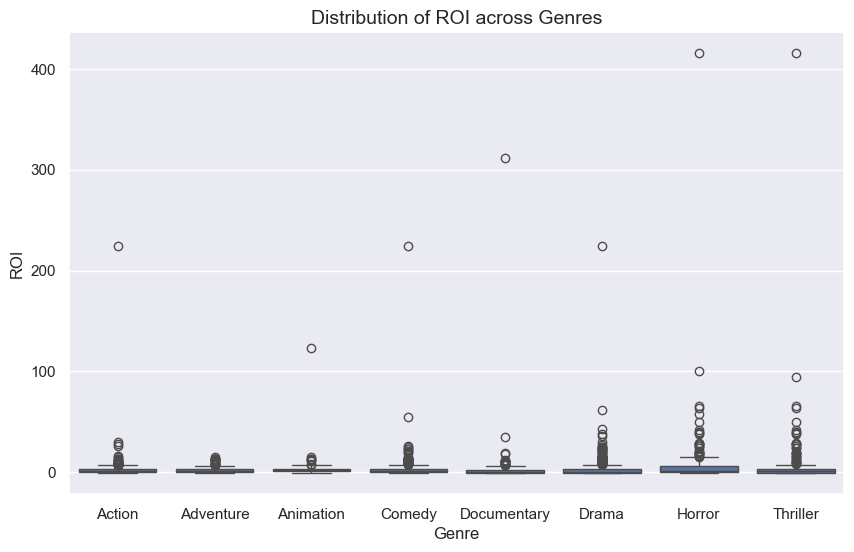

In [289]:
# Filter for major genres: 'Action', 'Drama', 'Comedy', 'Adventure'
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Documentary', 'Drama',  'Horror', 'Thriller']
imdb_genres = imdb.melt(id_vars=['ROI'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')
imdb_genres_filtered = imdb_genres[imdb_genres['Is_Genre'] == 1]
sns.set_theme(style="darkgrid")

# Create a box plot to visualize ROI distribution across genres
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Genre', y='ROI', data=imdb_genres_filtered)

# Add titles and labels
ax.set_title('Distribution of ROI across Genres', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)

# Show the plot
#plt.grid(True)
plt.show()

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/2151835110.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Genre', y='ROI', data=imdb_genres_filtered, showfliers=False, palette=my_genre)


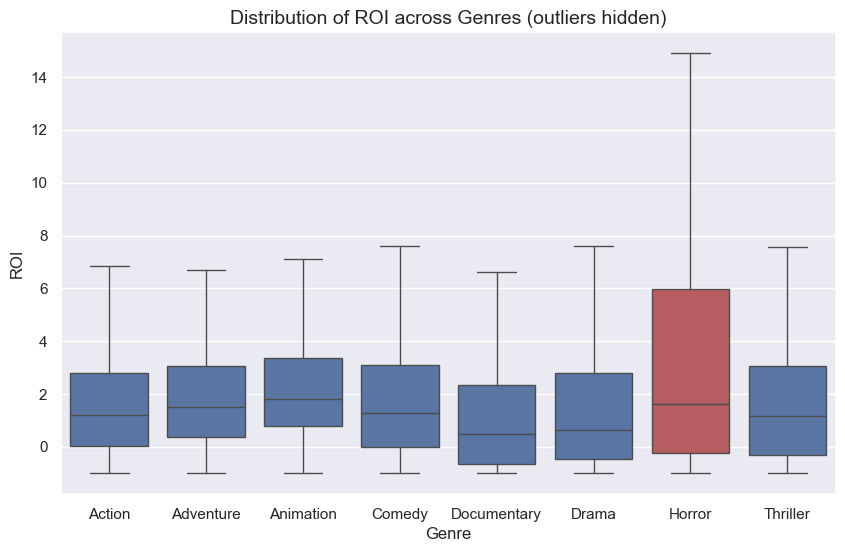

In [302]:
# Same boxplot as above but without outliers
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Documentary', 'Drama',  'Horror', 'Thriller']
imdb_genres = imdb.melt(id_vars=['ROI'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')
imdb_genres_filtered = imdb_genres[imdb_genres['Is_Genre'] == 1]
sns.set_theme(style="darkgrid")

# Create a box plot to visualize ROI distribution across genres
plt.figure(figsize=(10, 6))

my_genre = {genre: "r" if genre == "Horror" else "b" for genre in imdb_genres_filtered.Genre.unique()}
ax = sns.boxplot(x='Genre', y='ROI', data=imdb_genres_filtered, showfliers=False, palette=my_genre)

# Add titles and labels
ax.set_title('Distribution of ROI across Genres (outliers hidden)', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)

# Show the plot
#plt.grid(True)
plt.show()

In [298]:
imdb_genres_filtered

,worldwide_gross,Genre,Is_Genre
1,1045663875,Action,1
2,149762350,Action,1
3,1403013963,Action,1
4,2048134200,Action,1
5,655945209,Action,1
...,...,...,...
15469,23894000,Thriller,1
15477,62375,Thriller,1
15496,41656474,Thriller,1
15500,8799,Thriller,1


/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/2483911381.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Genre', y='worldwide_gross', data=imdb_genres_filtered, palette='husl')


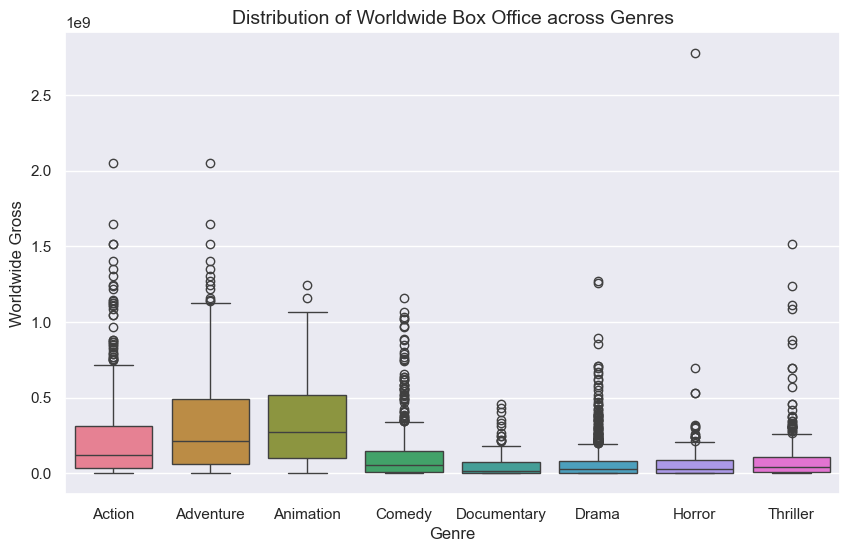

In [297]:
# Filter for major genres: 'Action', 'Drama', 'Comedy', 'Adventure'
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Documentary', 'Drama',  'Horror', 'Thriller']
imdb_genres = imdb.melt(id_vars=['worldwide_gross'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')
imdb_genres_filtered = imdb_genres[imdb_genres['Is_Genre'] == 1]
sns.set_theme(style="darkgrid")

# Create a box plot to visualize ROI distribution across genres
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Genre', y='worldwide_gross', data=imdb_genres_filtered, palette='husl')

# Add titles and labels
ax.set_title('Distribution of Worldwide Box Office across Genres', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Worldwide Gross', fontsize=12)

# Show the plot
#plt.grid(True)
plt.show()

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/726014396.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Genre', y='worldwide_gross', data=imdb_genres_filtered, showfliers=False, palette='husl')


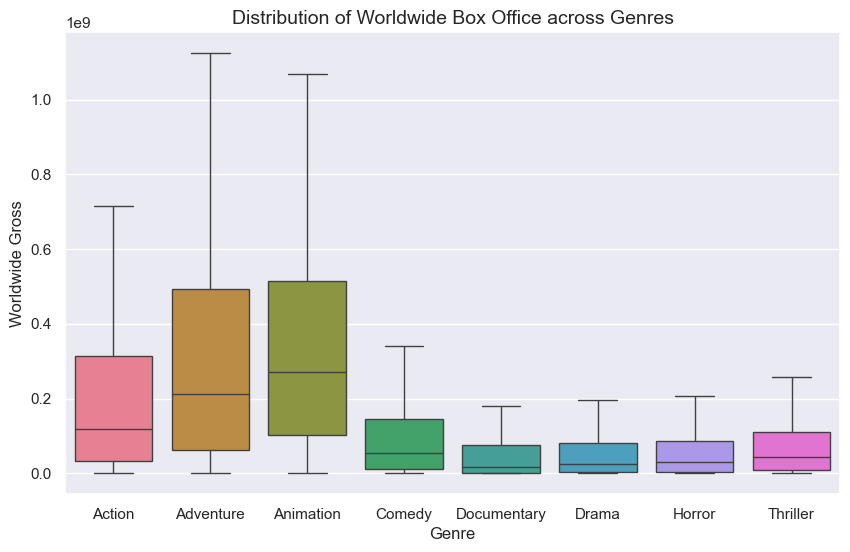

In [296]:
# Same as above but without outliers
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Documentary', 'Drama',  'Horror', 'Thriller']
imdb_genres = imdb.melt(id_vars=['worldwide_gross'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')
imdb_genres_filtered = imdb_genres[imdb_genres['Is_Genre'] == 1]
sns.set_theme(style="darkgrid")

# Create a box plot to visualize ROI distribution across genres
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Genre', y='worldwide_gross', data=imdb_genres_filtered, showfliers=False, palette='husl')

# Add titles and labels
ax.set_title('Distribution of Worldwide Box Office across Genres', fontsize=14)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Worldwide Gross', fontsize=12)

# Show the plot
plt.show()

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/3423437666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Genre', y='production_budget', data=imdb_genres_filtered, palette='husl')


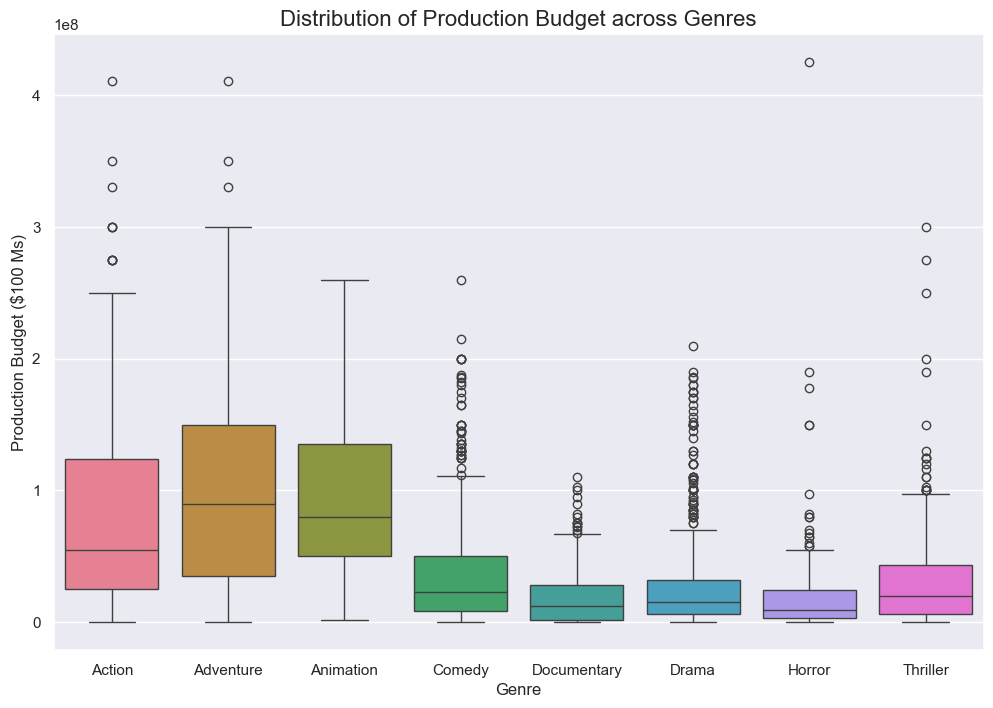

In [291]:
# Filter for major genres: 'Action', 'Drama', 'Comedy', 'Adventure'
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Documentary', 'Drama',  'Horror', 'Thriller']
imdb_genres = imdb.melt(id_vars=['production_budget'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')
imdb_genres_filtered = imdb_genres[imdb_genres['Is_Genre'] == 1]
sns.set_theme(style="darkgrid")
# Create a box plot to visualize ROI distribution across genres
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='Genre', y='production_budget', data=imdb_genres_filtered, palette='husl')

# Add titles and labels
ax.set_title('Distribution of Production Budget across Genres', fontsize=16)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Production Budget ($100 Ms)', fontsize=12)


# Show the plot
plt.show()

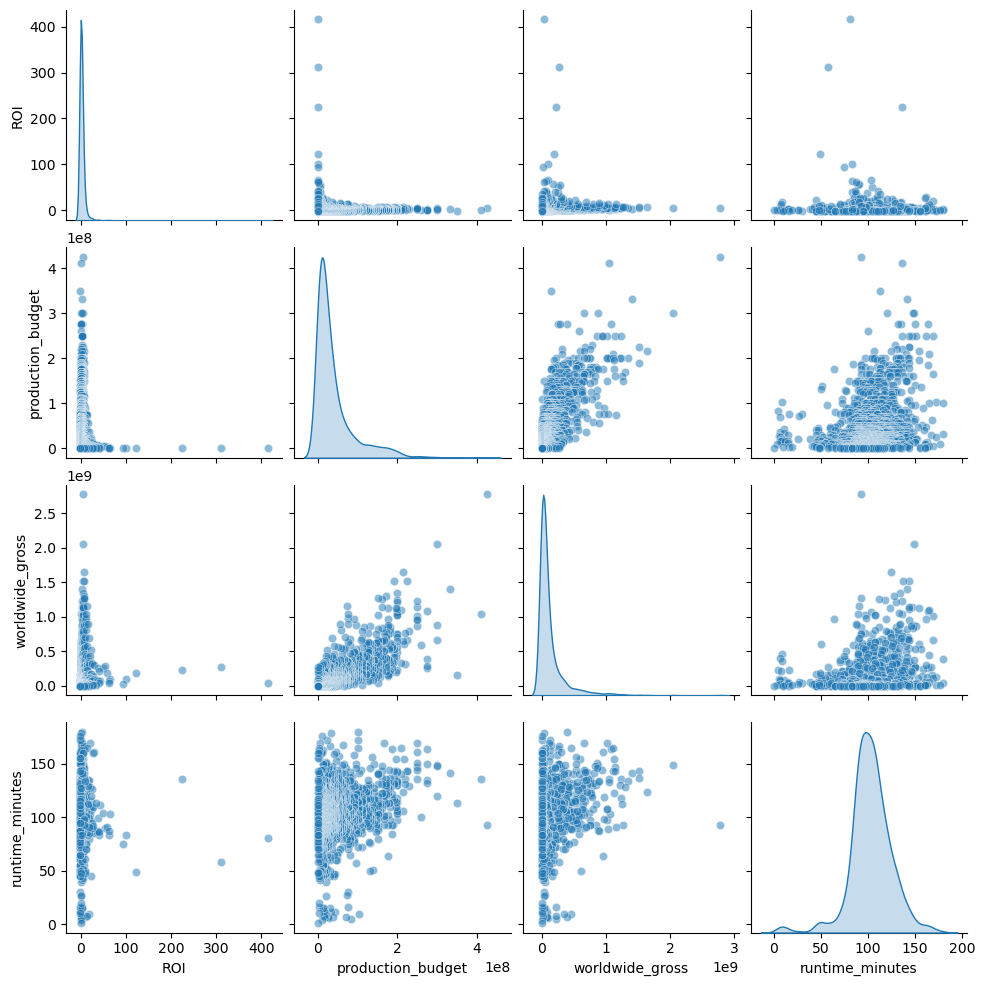

In [222]:
# Pairplot test
pairplot_data = imdb[['ROI', 'production_budget', 'worldwide_gross', 'runtime_minutes']]

# Create the pairplot
sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.5})

# Show the plot
plt.show()

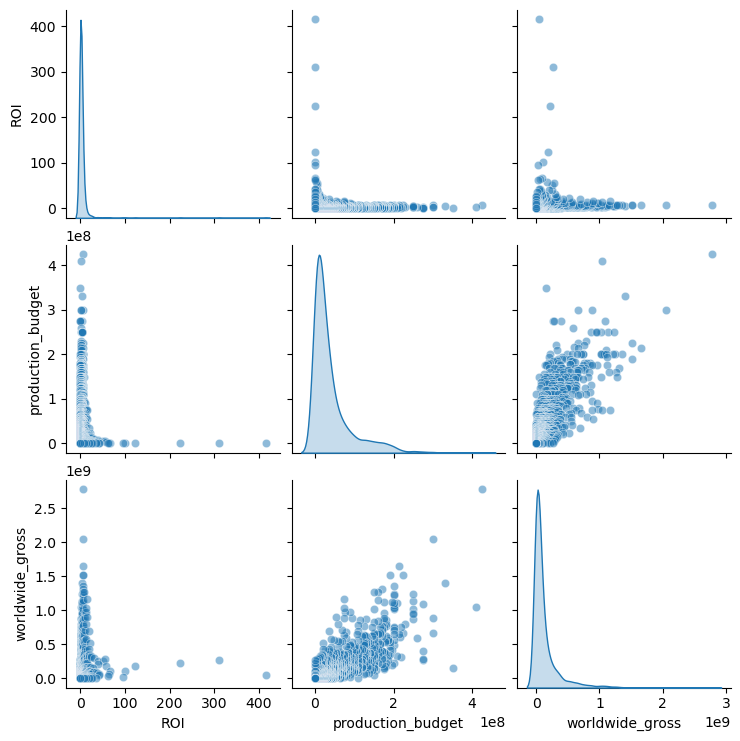

In [225]:
# Pairplot test
pairplot_data = imdb[['ROI', 'production_budget', 'worldwide_gross']]

# Create the pairplot
sns.pairplot(pairplot_data, diag_kind='kde', plot_kws={'alpha': 0.5})

# Show the plot
plt.show()

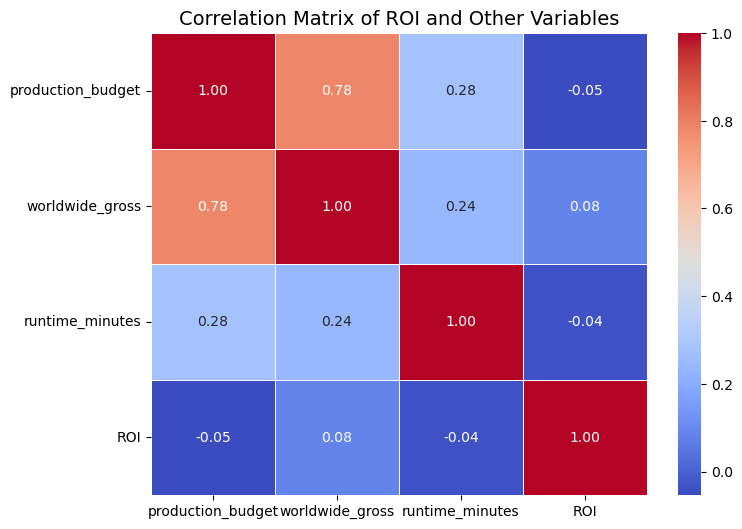

In [226]:
correlation_data = imdb[['production_budget', 'worldwide_gross', 'runtime_minutes', 'ROI']]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix of ROI and Other Variables', fontsize=14)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/3500135762.py:7: SyntaxWarning: invalid escape sequence '\d'
  imdb['Premiere_Month'] = imdb['Premiere_Month'].str.extract('(\d+)').astype(int)


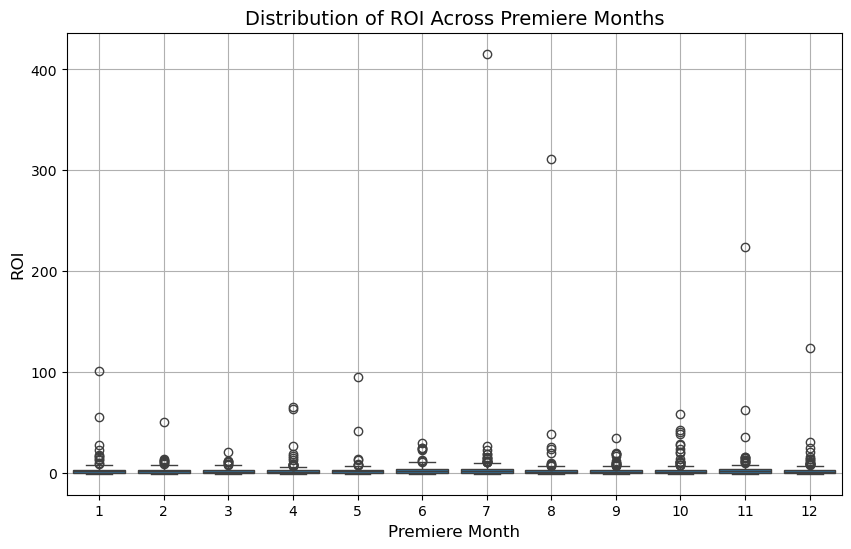

In [228]:
imdb['Premiere_Month'] = imdb[['premiere_month_1', 'premiere_month_2', 'premiere_month_3', 
                           'premiere_month_4', 'premiere_month_5', 'premiere_month_6', 
                           'premiere_month_7', 'premiere_month_8', 'premiere_month_9', 
                           'premiere_month_10', 'premiere_month_11', 'premiere_month_12']].idxmax(axis=1)

# Clean up the premiere_month values to extract the month number
imdb['Premiere_Month'] = imdb['Premiere_Month'].str.extract('(\d+)').astype(int)

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Premiere_Month', y='ROI', data=imdb)

# Add titles and labels
ax.set_title('Distribution of ROI Across Premiere Months', fontsize=14)
ax.set_xlabel('Premiere Month', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/3051268786.py:7: SyntaxWarning: invalid escape sequence '\d'
  imdb['Premiere_Month'] = imdb['Premiere_Month'].str.extract('(\d+)').astype(int)


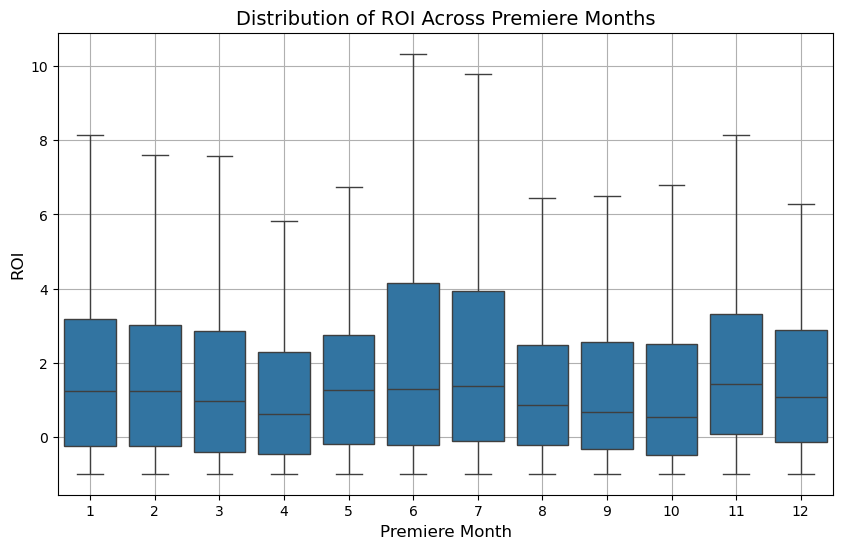

In [229]:
imdb['Premiere_Month'] = imdb[['premiere_month_1', 'premiere_month_2', 'premiere_month_3', 
                           'premiere_month_4', 'premiere_month_5', 'premiere_month_6', 
                           'premiere_month_7', 'premiere_month_8', 'premiere_month_9', 
                           'premiere_month_10', 'premiere_month_11', 'premiere_month_12']].idxmax(axis=1)

# Clean up the premiere_month values to extract the month number
imdb['Premiere_Month'] = imdb['Premiere_Month'].str.extract('(\d+)').astype(int)

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Premiere_Month', y='ROI', data=imdb, showfliers=False)

# Add titles and labels
ax.set_title('Distribution of ROI Across Premiere Months', fontsize=14)
ax.set_xlabel('Premiere Month', fontsize=12)
ax.set_ylabel('ROI', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_88944/544898505.py:7: SyntaxWarning: invalid escape sequence '\d'
  imdb['Premiere_Month'] = imdb['Premiere_Month'].str.extract('(\d+)').astype(int)


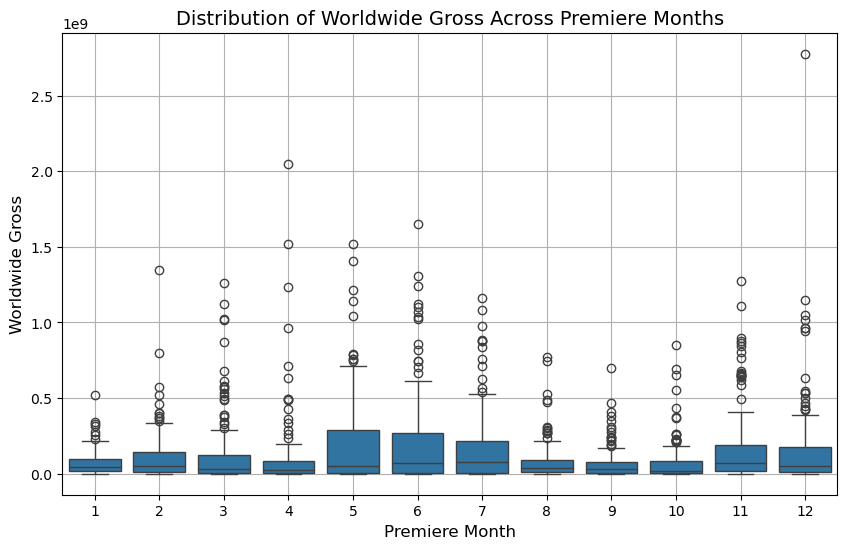

In [230]:
imdb['Premiere_Month'] = imdb[['premiere_month_1', 'premiere_month_2', 'premiere_month_3', 
                           'premiere_month_4', 'premiere_month_5', 'premiere_month_6', 
                           'premiere_month_7', 'premiere_month_8', 'premiere_month_9', 
                           'premiere_month_10', 'premiere_month_11', 'premiere_month_12']].idxmax(axis=1)

# Clean up the premiere_month values to extract the month number
imdb['Premiere_Month'] = imdb['Premiere_Month'].str.extract('(\d+)').astype(int)

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Premiere_Month', y='worldwide_gross', data=imdb)

# Add titles and labels
ax.set_title('Distribution of Worldwide Gross Across Premiere Months', fontsize=14)
ax.set_xlabel('Premiere Month', fontsize=12)
ax.set_ylabel('Worldwide Gross', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()

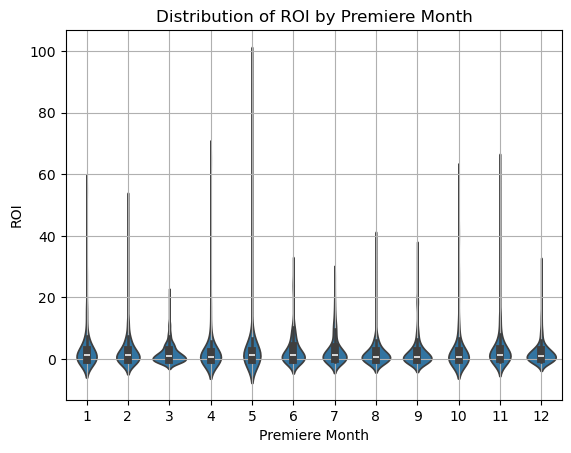

In [240]:
sns.violinplot(x='Premiere_Month', y=imdb[imdb['ROI']<100]['ROI'], data=imdb)
#ax.set_ylim(ymax=150)
plt.title('Distribution of ROI by Premiere Month')
plt.xlabel('Premiere Month')
plt.ylabel('ROI')
plt.grid(True)
plt.show()